# GRIP : THE SPARK FOUNDATION

# Data Science and Business Analytics Intern

# Author : Vijay Somnath Totla

# Task 1 : Predication Using Supervised ML

In this task we have to predict the percentage sccore of student based on the number of hours studied.
The task has two variable where the feature is the number of hours stuided and the target value is the percentage score.
This can be solved using simple linear regression.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data form the remote url

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

Exploring the readed data.

In [4]:
print(dataset.shape)

(25, 2)


In [6]:
dataset.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


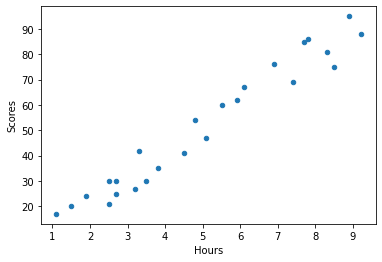

In [9]:
dataset.plot(kind = 'scatter', x = 'Hours', y = 'Scores')
plt.show()

In [11]:
dataset.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
dataset.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [13]:
hours = dataset['Hours']
score = dataset['Scores']

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

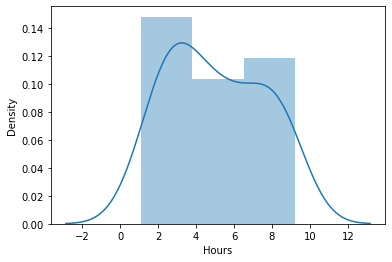

In [16]:
sns.distplot(hours)


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

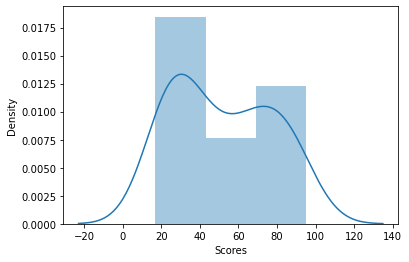

In [17]:
sns.distplot(score)

# Linear regression

In [18]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Spliting the dataset into training and testing dataset.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the linear regression model on the training dataset.

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

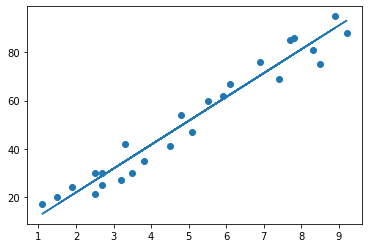

In [24]:
m = regressor.coef_
c = regressor.intercept_

line = m*X+c

plt.scatter(X,y)
plt.plot(X, line)
plt.show()

Testing the test dataset by Linear Regression 

In [22]:
y_pred = regressor.predict(X_test)

dataframe = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

# printing the dataframe

print(dataframe)

# printing the accuracy 

print("\n Accuracy is :", regressor.score(X,y)*100)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

 Accuracy is : 95.26947647057274


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


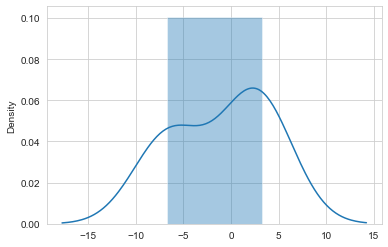

In [26]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

What would be the predicted score if a student studied for 9.25 hours/day???

In [36]:
hr = 9.25
s = regressor.predict([[hr]])

print("If a student studies for ",hr," hours per day student will score ",s,"% in exam")

If a student studies for  9.25  hours per day student will score  [93.69173249] % in exam


Model evaluation

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Squared Erroe:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred)*100)

Mean Squared Erroe: 21.5987693072174
Mean Absolute Error: 4.183859899002975
R2 score: 94.54906892105356


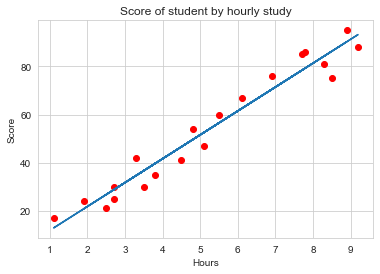

In [39]:
plt.scatter(X_train,y_train,color="r")
plt.title("Score of student by hourly study")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.plot(X_train,regressor.predict(X_train),"-")
plt.show()

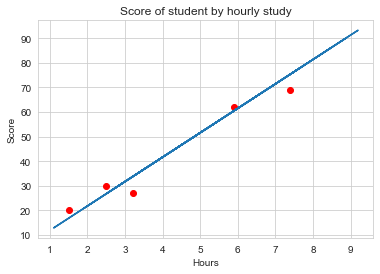

In [40]:
plt.scatter(X_test,y_test,color="r")
plt.title("Score of student by hourly study")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.plot(X_train,regressor.predict(X_train),"-")
plt.show()